In [2]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 

In [3]:
from sklearn.model_selection import train_test_split 

In [4]:
games=pd.read_csv("D:\MACHINE_LEARNING_DATA_SCIENCE\Data_Files/games.csv")

In [5]:
print(games.columns)
print(games.shape)

Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')
(81312, 20)


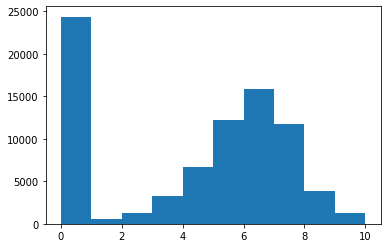

In [10]:
plt.hist(games["average_rating"])
plt.show()

In [12]:
games=games[games["average_rating"]>0]

(array([  602.,  1232.,  2824.,  5212.,  8230., 13606., 13859.,  8471.,
         2224.,   672.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <a list of 10 Patch objects>)

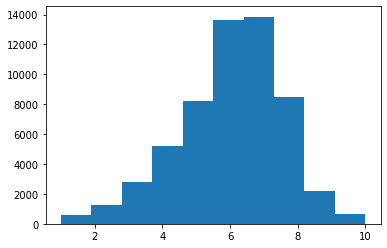

In [13]:
plt.hist(games["average_rating"])

In [14]:
games.describe()

,id,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
count,56932.000000,56930.000000,56930.000000,56930.000000,56930.000000,56930.000000,56930.000000,56930.000000,56932.000000,56932.000000,56932.000000,56932.000000,56932.000000,56932.000000,56932.000000,56932.000000,56932.000000,56932.000000
mean,64124.321998,1874.770385,2.005041,5.573792,59.908818,57.446057,59.908818,7.592816,231.211305,6.015911,1.653365,374.264754,13.157750,17.990937,60.539486,70.298672,23.533496,1.269279
std,57516.147278,486.079228,0.791646,50.757504,406.324651,393.074343,406.324651,4.868998,1363.681366,1.578552,2.645948,1786.432000,46.970226,71.961726,284.070672,338.267232,138.008185,1.213857
min,1.000000,-3500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16145.750000,1989.000000,2.000000,2.000000,15.000000,15.000000,15.000000,4.000000,2.000000,5.000000,0.000000,5.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,36955.500000,2005.000000,2.000000,4.000000,30.000000,30.000000,30.000000,8.000000,7.000000,6.150000,0.000000,20.000000,1.000000,1.000000,3.000000,4.000000,1.000000,1.000000
75%,118610.000000,2011.000000,2.000000,6.000000,60.000000,60.000000,60.000000,12.000000,39.000000,7.039372,5.488010,125.000000,6.000000,6.000000,15.000000,19.000000,5.000000,2.000000
max,184260.000000,2017.000000,40.000000,11299.000000,60120.000000,60120.000000,60120.000000,120.000000,53680.000000,10.000000,8.221860,73188.000000,1395.000000,1586.000000,6402.000000,11798.000000,5996.000000,5.000000


In [15]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56932 entries, 0 to 81279
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    56932 non-null  int64  
 1   type                  56932 non-null  object 
 2   name                  56896 non-null  object 
 3   yearpublished         56930 non-null  float64
 4   minplayers            56930 non-null  float64
 5   maxplayers            56930 non-null  float64
 6   playingtime           56930 non-null  float64
 7   minplaytime           56930 non-null  float64
 8   maxplaytime           56930 non-null  float64
 9   minage                56930 non-null  float64
 10  users_rated           56932 non-null  int64  
 11  average_rating        56932 non-null  float64
 12  bayes_average_rating  56932 non-null  float64
 13  total_owners          56932 non-null  int64  
 14  total_traders         56932 non-null  int64  
 15  total_wanters      

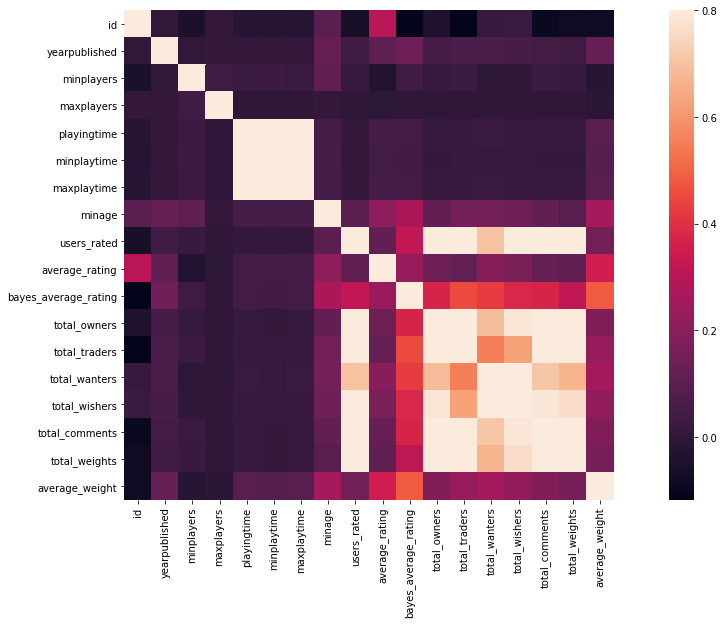

In [21]:
## plotting the data to get some insight. seaborn heatmap offers a great visual intuition about the data
corrmat=games.corr()
fig=plt.figure(figsize=(20,9))
sns.heatmap(corrmat,vmax=.8,square=True)
plt.show()


In [27]:
# we do not want some data to be ther in our training models such as id, name as they do not have any impact on our prediction of game_review.
# again since  our target is to predict game_review, we do not want averera_review and bayes_average_review to be ther in the data
# lets drop these columns
# .tolist() is a very usefull function
columns=games.columns.tolist()
print(columns)

#now we want ot filter our columns

columns_final=[c for c in columns if c not in ["bayes_average_rating","average_rating","id","name","type"]]
print(columns_final)

['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers', 'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated', 'average_rating', 'bayes_average_rating', 'total_owners', 'total_traders', 'total_wanters', 'total_wishers', 'total_comments', 'total_weights', 'average_weight']
['yearpublished', 'minplayers', 'maxplayers', 'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated', 'total_owners', 'total_traders', 'total_wanters', 'total_wishers', 'total_comments', 'total_weights', 'average_weight']


In [30]:
target="average_rating"
train=games.sample(frac=0.8,random_state=1)
test=games.loc[~games.index.isin(train.index)]

In [31]:
print(train.shape)
print(test.shape)

(45546, 20)
(11386, 20)


In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45546 entries, 49731 to 30333
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    45546 non-null  int64  
 1   type                  45546 non-null  object 
 2   name                  45515 non-null  object 
 3   yearpublished         45544 non-null  float64
 4   minplayers            45544 non-null  float64
 5   maxplayers            45544 non-null  float64
 6   playingtime           45544 non-null  float64
 7   minplaytime           45544 non-null  float64
 8   maxplaytime           45544 non-null  float64
 9   minage                45544 non-null  float64
 10  users_rated           45546 non-null  int64  
 11  average_rating        45546 non-null  float64
 12  bayes_average_rating  45546 non-null  float64
 13  total_owners          45546 non-null  int64  
 14  total_traders         45546 non-null  int64  
 15  total_wanters  

In [34]:
train_set=train[columns_final]
train_target=train[target]
test_set=test[columns_final]
test_target=test[target]

In [36]:
from sklearn.linear_model import LinearRegression

In [38]:
type(games)

pandas.core.frame.DataFrame

In [ ]:
median=games[""].median()
isn(housing.isnull().any(axis=1)).fillna(median,inplace=True)

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
81260,184187,boardgameexpansion,Rum & Bones: Skullkicker heroes,2015.0,2.0,6.0,0.0,60.0,0.0,14.0,1,8.0,0.0,16,0,0,1,2,1,1.0
81261,184189,boardgameexpansion,Rum & Bones: Luck Goddesses,2015.0,2.0,6.0,0.0,60.0,0.0,14.0,1,8.0,0.0,19,0,0,1,2,1,1.0
81263,184195,boardgameexpansion,Rum & Bones: Mercenary Tide Deck,2015.0,2.0,6.0,0.0,60.0,0.0,14.0,1,8.0,0.0,22,0,0,0,2,1,1.0
81278,184258,boardgame,Rocket Shogi,2012.0,2.0,2.0,0.0,10.0,0.0,8.0,1,7.0,0.0,0,0,0,0,1,0,0.0
81279,184260,boardgame,Tricky Pirates,2015.0,2.0,4.0,60.0,30.0,60.0,8.0,1,7.0,0.0,1,0,0,0,0,2,1.5


In [47]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [43]:
from sklearn.base import BaseEstimator, TransformerMixin

# Create a class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values
#helps us to run pipelines on the num and cat columns

In [52]:
DataFrameSelector(columns_final)

DataFrameSelector(attribute_names=['yearpublished', 'minplayers', 'maxplayers',
                                   'playingtime', 'minplaytime', 'maxplaytime',
                                   'minage', 'users_rated', 'total_owners',
                                   'total_traders', 'total_wanters',
                                   'total_wishers', 'total_comments',
                                   'total_weights', 'average_weight'])

In [55]:
gm_pipeline=Pipeline[('selector',DataFrameSelector(columns_final)),('imputer',SimpleImputer(strategy='median'))]

TypeError: 'ABCMeta' object is not subscriptable

In [67]:
isn=games[columns_final].isnull()
isn.any(axis=1)


0        False
1        False
2        False
3        False
4        False
         ...  
81260    False
81261    False
81263    False
81278    False
81279    False
Length: 56932, dtype: bool

In [62]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45546 entries, 49731 to 30333
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    45546 non-null  int64  
 1   type                  45546 non-null  object 
 2   name                  45515 non-null  object 
 3   yearpublished         45544 non-null  float64
 4   minplayers            45544 non-null  float64
 5   maxplayers            45544 non-null  float64
 6   playingtime           45544 non-null  float64
 7   minplaytime           45544 non-null  float64
 8   maxplaytime           45544 non-null  float64
 9   minage                45544 non-null  float64
 10  users_rated           45546 non-null  int64  
 11  average_rating        45546 non-null  float64
 12  bayes_average_rating  45546 non-null  float64
 13  total_owners          45546 non-null  int64  
 14  total_traders         45546 non-null  int64  
 15  total_wanters  

In [68]:
bool_series=pd.notnull(games['minage'])

In [69]:
games=games[bool_series]

In [71]:
games[columns_final].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56930 entries, 0 to 81279
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   yearpublished   56930 non-null  float64
 1   minplayers      56930 non-null  float64
 2   maxplayers      56930 non-null  float64
 3   playingtime     56930 non-null  float64
 4   minplaytime     56930 non-null  float64
 5   maxplaytime     56930 non-null  float64
 6   minage          56930 non-null  float64
 7   users_rated     56930 non-null  int64  
 8   total_owners    56930 non-null  int64  
 9   total_traders   56930 non-null  int64  
 10  total_wanters   56930 non-null  int64  
 11  total_wishers   56930 non-null  int64  
 12  total_comments  56930 non-null  int64  
 13  total_weights   56930 non-null  int64  
 14  average_weight  56930 non-null  float64
dtypes: float64(8), int64(7)
memory usage: 6.9 MB


In [126]:
target="average_rating"
train=games.sample(frac=0.8,random_state=1)
test=games.loc[~games.index.isin(train.index)]


In [158]:
train_set=train[columns_final]
train_target=train['average_rating']
test_set=test[columns_final]
test_target=test['average_rating']

In [159]:
from sklearn.linear_model import LinearRegression

In [171]:
LR=LinearRegression()
LR.fit(train_set,train_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [172]:
#lets see how good are our predictions on our teset data
predictions=LR.predict(test_set)

In [173]:
from sklearn.metrics import mean_squared_error

In [174]:
mean_squared_error=mean_squared_error(predictions,test_target)

In [175]:
print(mean_squared_error)

2.1037979217684066


In [165]:
from sklearn.ensemble import RandomForestRegressor

In [176]:
RFR=RandomForestRegressor(n_estimators=100,min_samples_leaf=10,random_state=1)
RFR.fit(train_set,train_target)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=10,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [190]:
RFR_predictions=RFR.predict(test_set)
print(RFR_predicttions[110])
print(predictions[110])

6.93003492964049
6.595659913621573


In [195]:
print(test_target[100])

8.113439999999999


In [138]:
print(test_set.shape)
print(test_target.shape)

(11386, 15)
(11386,)


In [109]:
print(test_d.info())
print("-____----____----____")
print(test_set.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11386 entries, 9 to 81279
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   average_rating  11386 non-null  float64
dtypes: float64(1)
memory usage: 177.9 KB
None
-____----____----____
<class 'pandas.core.frame.DataFrame'>
Int64Index: 11386 entries, 9 to 81279
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   yearpublished   11386 non-null  float64
 1   minplayers      11386 non-null  float64
 2   maxplayers      11386 non-null  float64
 3   playingtime     11386 non-null  float64
 4   minplaytime     11386 non-null  float64
 5   maxplaytime     11386 non-null  float64
 6   minage          11386 non-null  float64
 7   users_rated     11386 non-null  int64  
 8   total_owners    11386 non-null  int64  
 9   total_traders   11386 non-null  int64  
 10  total_wanters   11386 non-null  in

In [153]:
test_tr=pd.DataFrame(test_target)
print(type(test_tr))
test_tr.info()

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
Int64Index: 11386 entries, 9 to 81279
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   average_rating  11386 non-null  float64
dtypes: float64(1)
memory usage: 177.9 KB


In [151]:
test_target_nm=test_target.to_numpy()
print(type(test_target_nm))
test_target_nm.reshape(11386,-1)
print(type(test_target_nm))
# pd.DataFrame[test_target.reshape(11386,-1)]

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [123]:
mean_squared_error=mean_squared_error(RFR_predicttions,test_target)

TypeError: 'numpy.float64' object is not callable

In [154]:
test_target_nm[100]

7.52018